In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.read_csv("results/llama3-8b_lora_sft_bf16-p2_en.csv")
df

text label  \
0                              Was Zhen Zhesuo suicide?    No   
1                               Was Zhen Zhesuo sickly?   Yes   
2                             The painting was by Zhen.   Yes   
3                      Was Zhen with a heart condition?   Yes   
4                  The wheel was the murderer's weapon.    No   
...                                                 ...   ...   
2995  Did the weeping person have to make a sacrific...   Yes   
2996                          Was the body in the lake?    No   
2997  Do mourners have a special relationship with t...   Yes   
2998                     Was the owner of the hat dead?    No   
2999                       Was the dead person wounded?    No   

                         title  \
0     The Mystery of the Coast   
1     The Mystery of the Coast   
2     The Mystery of the Coast   
3     The Mystery of the Coast   
4     The Mystery of the Coast   
...                        ...   
2995         Zhen Zhuo's wails   
2996         Zhen Zhuo's wails   
2997         Zhen Zhuo's wails   
2998         Zhen Zhuo's wails   
2999         Zhen Zhuo's wails   

                                                 puzzle  \
0     In the quiet seaside cottage of a neighbor, a ...   
1     In the quiet seaside cottage of a neighbor, a ...   
2     In the quiet seaside cottage of a neighbor, a ...   
3     In the quiet seaside cottage of a neighbor, a ...   
4     In the quiet seaside cottage of a neighbor, a ...   
...                                                 ...   
2995  One night, in a quiet village, a weeping sound...   
2996  One night, in a quiet village, a weeping sound...   
2997  One night, in a quiet village, a weeping sound...   
2998  One night, in a quiet village, a weeping sound...   
2999  One night, in a quiet village, a weeping sound...   

                                                  truth  \
0     Zhen Zhesao was a nature-loving painter who ca...   
1     Zhen Zhesao was a nature-loving painter who ca...   
2     Zhen Zhesao was a nature-loving painter who ca...   
3     Zhen Zhesao was a nature-loving painter who ca...   
4     Zhen Zhesao was a nature-loving painter who ca...   
...                                                 ...   
2995  It turned out that the old hat belonged to a l...   
2996  It turned out that the old hat belonged to a l...   
2997  It turned out that the old hat belonged to a l...   
2998  It turned out that the old hat belonged to a l...   
2999  It turned out that the old hat belonged to a l...   

     meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf  \
0                                                    No                     
1                                                   Yes                     
2                                                   Yes                     
3                                                   Yes                     
4                                                    No                     
...                                                 ...                     
2995                                        Unimportant                     
2996                                                 No                     
2997                                                Yes                     
2998                                                Yes                     
2999                                                 No                     

     meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf  \
0                                                    No                     
1                                                   Yes                     
2                                                   Yes                     
3                                                   Yes                     
4                                                    No                     
...                                                 ... 

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_value_counts(df, column):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")
    plt.show()
    
    rcParams["font.family"] = font_family


In [7]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf',
 'meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf',
 'meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf',
 'meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf']

In [8]:
df = df[
    [
        "text",
        "label",
        "title",
        "puzzle",
        "truth",
        "meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf",
        "meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf",
        "meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf",
        "meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf",
    ]
]

********** meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf **********
meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf
Unimportant                                                                                      1132
**Response:** Unimportant                                                                         563
**Response:** Yes                                                                                 264
Correct answer                                                                                    225
Unimportant.                                                                                      181
**Response:** Correct answer                                                                      175
Yes.                                                                                              100
Correct answer.                                                                                    69
**Response:** No                                      

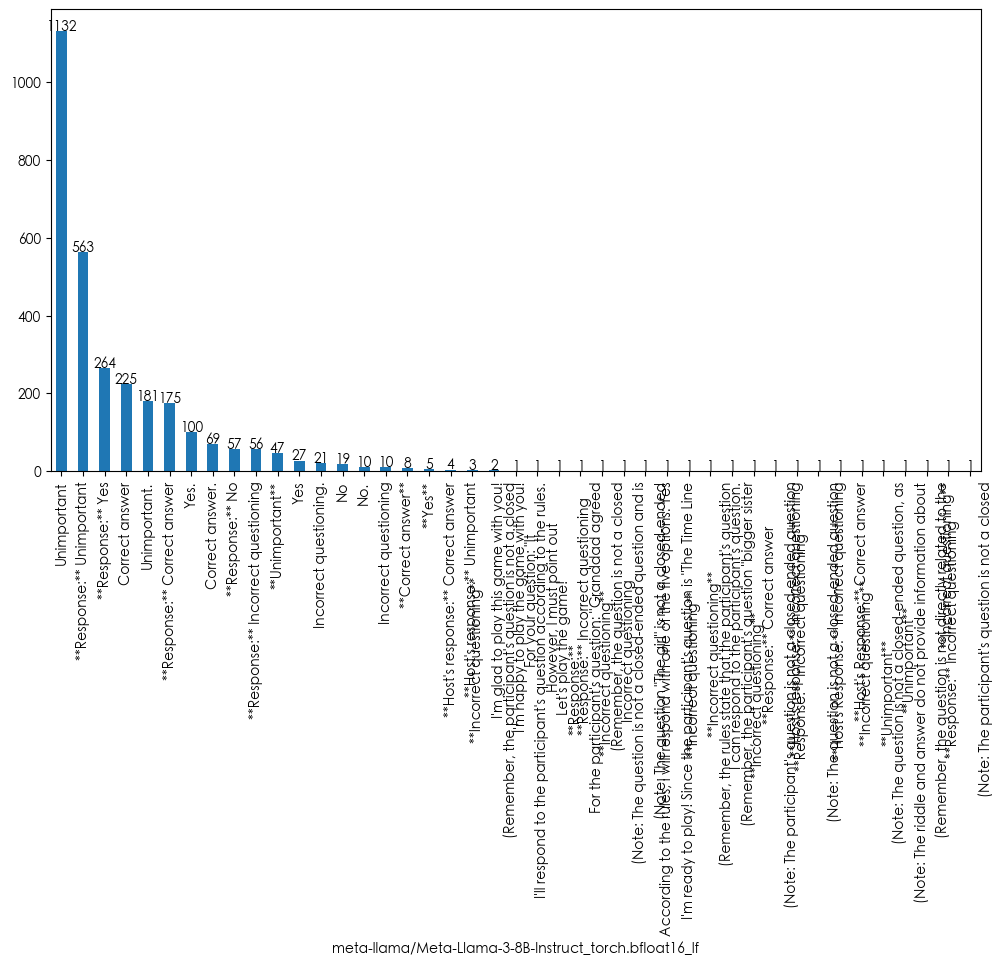

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf **********
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf
No                       1564
Yes                      1012
Unimportant               353
Incorrect questioning      50
Correct answer             21
Name: count, dtype: int64


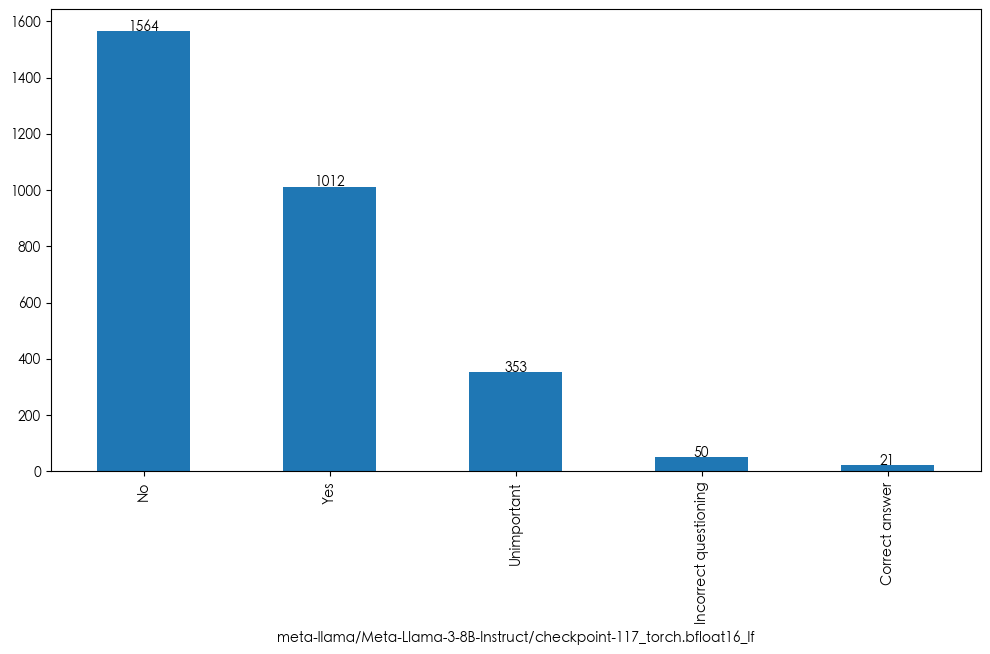

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf **********
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf
No                       1210
Yes                       902
Unimportant               746
Incorrect questioning      88
Correct answer             54
Name: count, dtype: int64


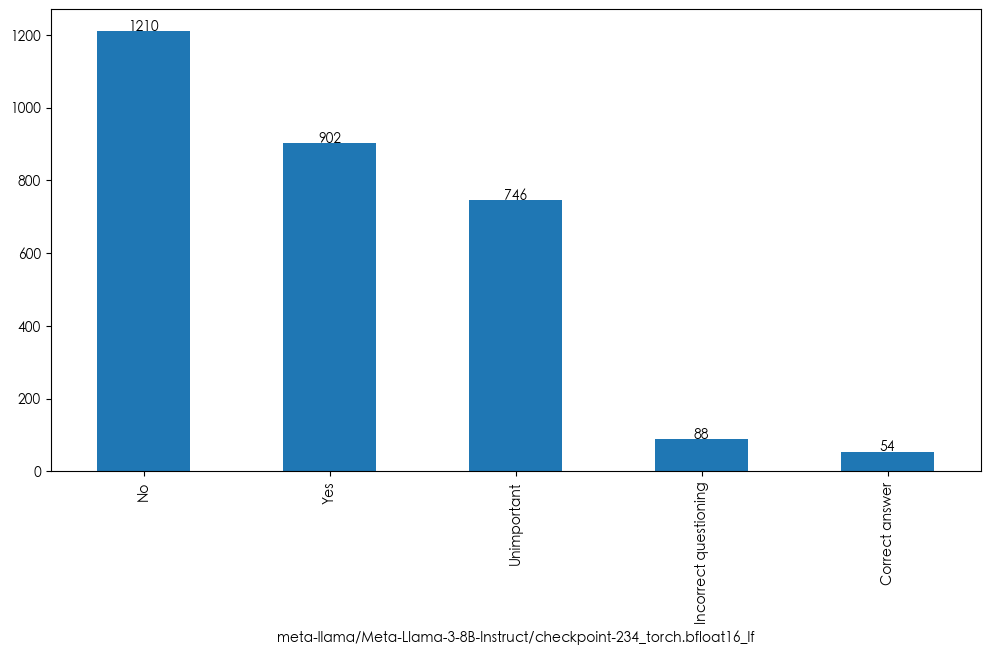

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf **********
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf
No                       1589
Yes                       895
Unimportant               434
Incorrect questioning      45
Correct answer             37
Name: count, dtype: int64


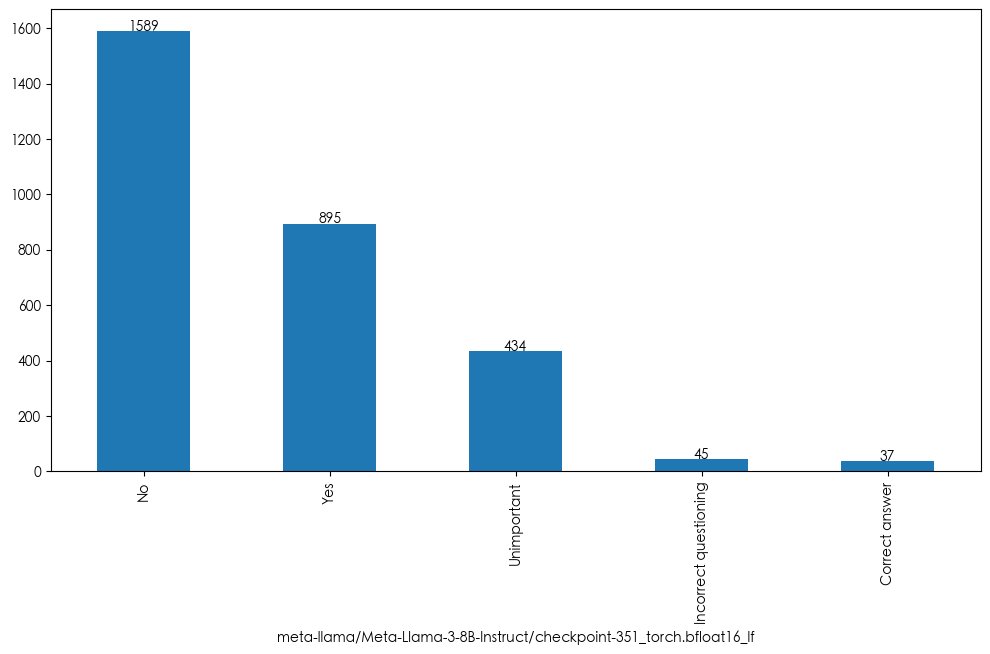

In [9]:
for col in df.columns[5:]:
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [10]:
import re


def clean_up(df, model_name):
    df[model_name] = df[model_name].apply(
        lambda x: (
            re.sub(r".*esponse.*:", "", x)
            .split("\n")[-1]
            .replace(".", "")
            .replace("**", "")
            .strip()
            if isinstance(x, str)
            else x
        )
    )
    return df

********** meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf **********
23
meta-llama/Meta-Llama-3-8B-Instruct_torch.bfloat16_lf
Unimportant                                                                 1926
Correct answer                                                               483
Yes                                                                          396
Incorrect questioning                                                         90
No                                                                            86
(Remember, the participant's question is not a closed                          2
I'm ready to play! Since the participant's question is "The Time Line          1
However, I must point out                                                      1
                                                                               1
For the participant's question: "Granddad agreed                               1
(Remember, the question is not a closed                  

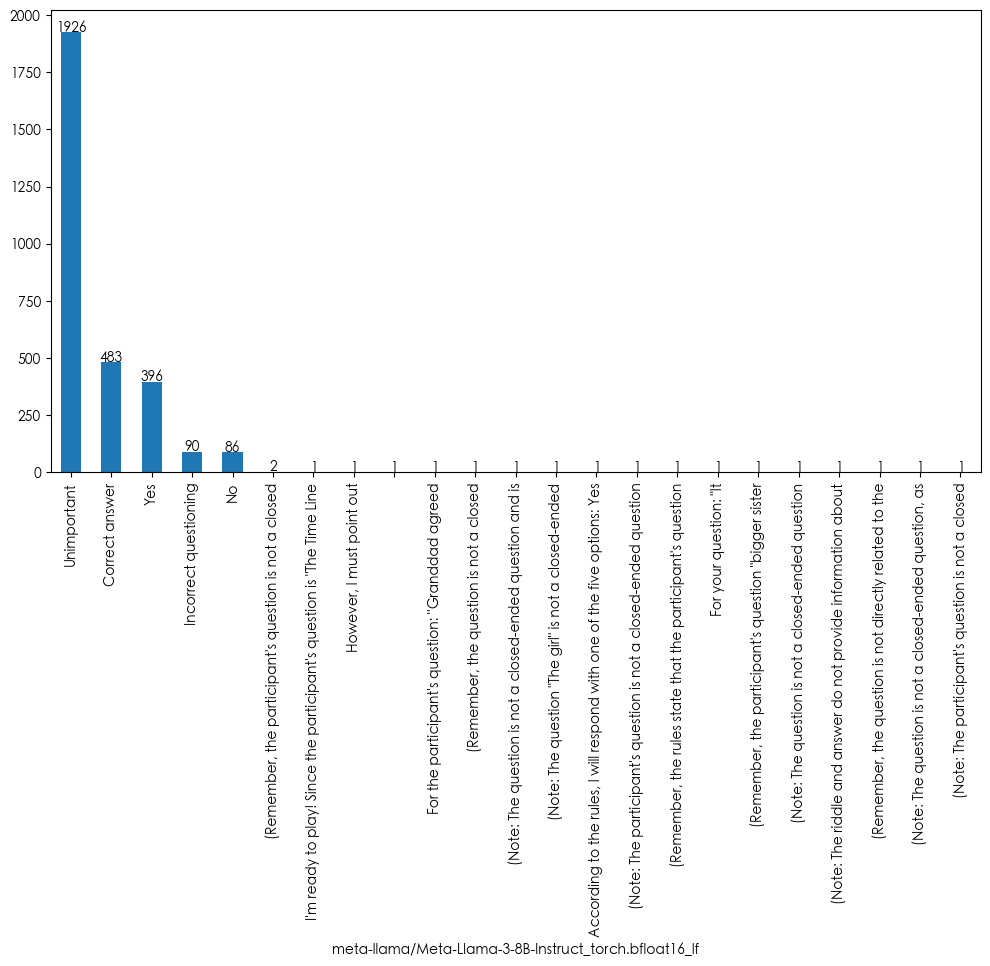

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf **********
5
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-117_torch.bfloat16_lf
No                       1564
Yes                      1012
Unimportant               353
Incorrect questioning      50
Correct answer             21
Name: count, dtype: int64


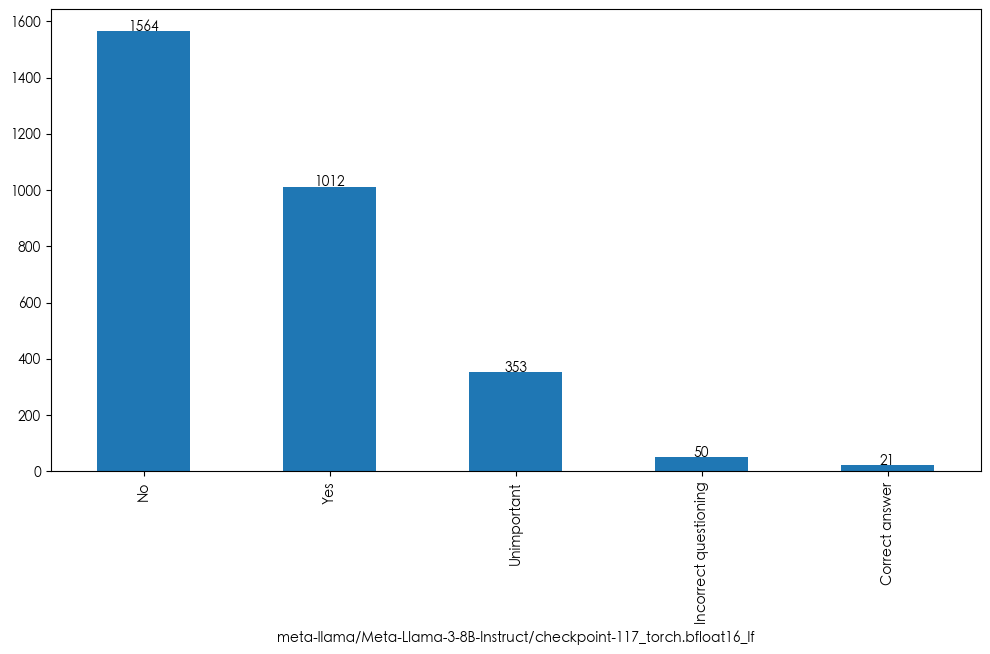

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf **********
5
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-234_torch.bfloat16_lf
No                       1210
Yes                       902
Unimportant               746
Incorrect questioning      88
Correct answer             54
Name: count, dtype: int64


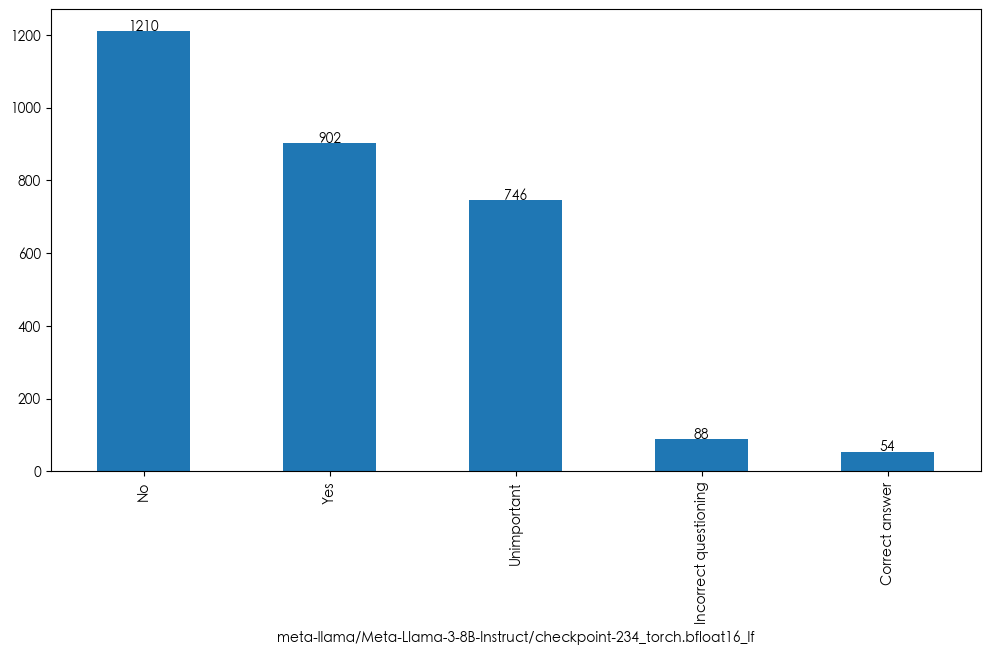

********** meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf **********
5
meta-llama/Meta-Llama-3-8B-Instruct/checkpoint-351_torch.bfloat16_lf
No                       1589
Yes                       895
Unimportant               434
Incorrect questioning      45
Correct answer             37
Name: count, dtype: int64


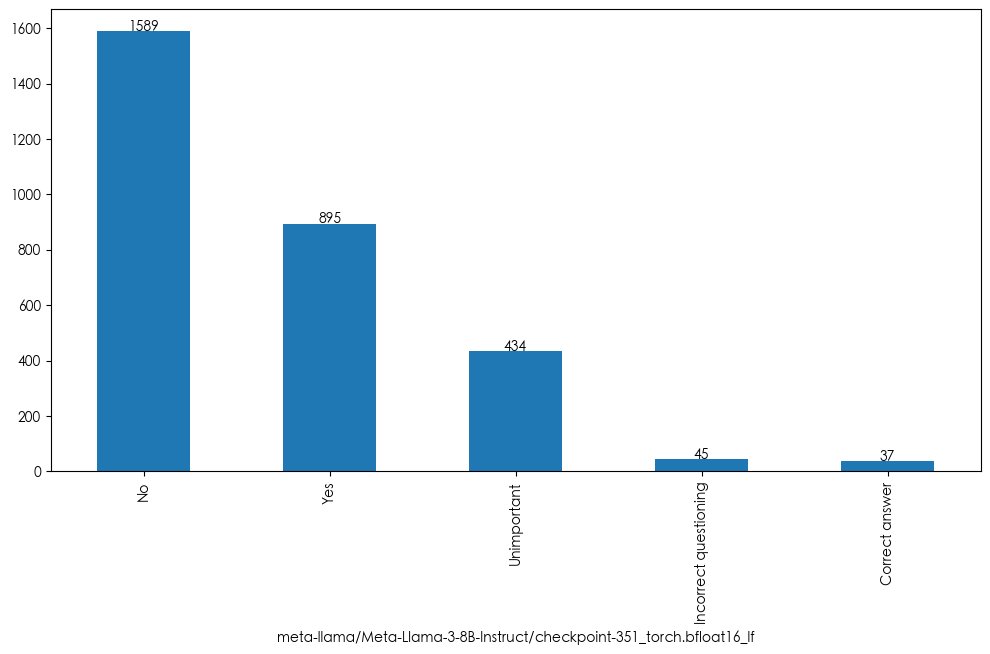

In [11]:
for col in df.columns[5:]:
    df = clean_up(df, col)
    print("*" * 10, col, "*" * 10)
    print(df[col].nunique())
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_col(df, col):
    y_true = df["label"]
    y_pred = df[col]
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
        recall = recall_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
        f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    except Exception as e:
        print(e)
        accuracy = precision = recall = f1 = np.nan

    return accuracy, float(precision), float(recall), float(f1)

In [13]:
import pandas as pd

perf_df = pd.DataFrame(
    columns=["epoch", "model", "accuracy", "precision", "recall", "f1"]
)
for i, col in enumerate(df.columns[5:]):
    accuracy, precision, recall, f1 = calc_metrics_for_col(df, col)
    new_model_metrics = {
        "epoch": i / 3,
        "model": col,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)

perf_df

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_91143/1887142834.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)


epoch                                              model  accuracy  \
0  0.000000  meta-llama/Meta-Llama-3-8B-Instruct_torch.bflo...  0.154667   
1  0.333333  meta-llama/Meta-Llama-3-8B-Instruct/checkpoint...  0.620333   
2  0.666667  meta-llama/Meta-Llama-3-8B-Instruct/checkpoint...  0.561333   
3  1.000000  meta-llama/Meta-Llama-3-8B-Instruct/checkpoint...  0.620333   

   precision    recall        f1  
0   0.521852  0.154667  0.176118  
1   0.663582  0.620333  0.636363  
2   0.700051  0.561333  0.611304  
3   0.681920  0.620333  0.640515

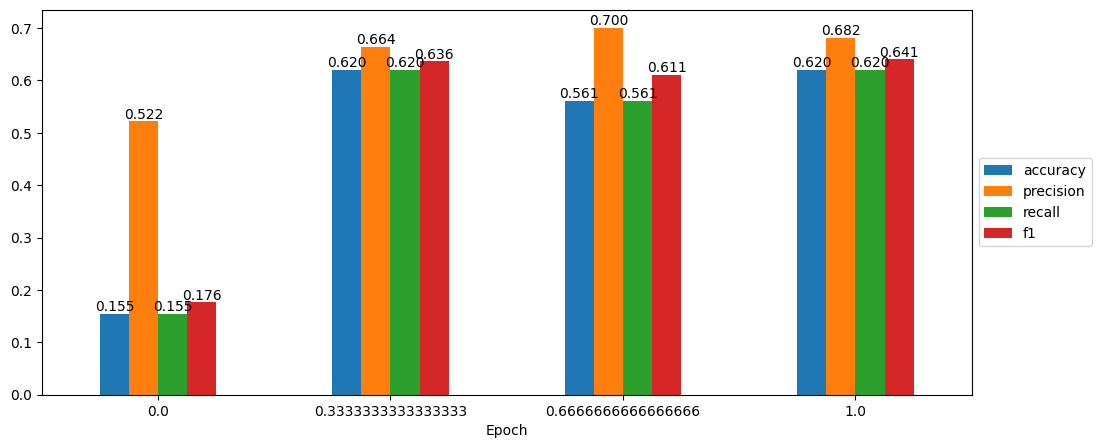

In [14]:
# plot metrics for each model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

perf_df.plot(x="epoch", y=["accuracy", "precision", "recall", "f1"], kind="bar", ax=ax)

# add values on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# add title and labels
# ax.set_title("Metrics for different settings")
# ax.set_ylabel("Value")
ax.set_xlabel("Epoch")
# rotate x labels
plt.xticks(rotation=0)

# set legend at the right to avoid overlapping with bars
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
# plt.tight_layout()

plt.show()

In [15]:
perf_df.to_csv("results/mgtv-llama3_p2_en_full_metrics.csv", index=False)